# Atliq bank project 
# Phase 1

In [1]:
import pandas as pd
from matplotlib import pyplot  as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_cust = pd.read_csv("datasets/customers.csv")
df_cs = pd.read_csv("datasets/credit_profiles.csv")
df_trans = pd.read_csv("datasets/transactions.csv")
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [4]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [5]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


# Data Cleaning

In [6]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [7]:
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [8]:
df_cust.annual_income.median()

112218.5

In [9]:
df_cust[df_cust.occupation == "Artist"].annual_income.median()

45794.0

In [10]:
occupation_wise_median_income = df_cust.groupby("occupation").annual_income.median()
occupation_wise_median_income

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

**Dealing with null values** 

In [11]:
df_cust["annual_income"] = df_cust.apply( 
    lambda row: occupation_wise_median_income[row["occupation"]] if pd.isnull(row["annual_income"]) else row["annual_income"],
    axis = 1
)

In [12]:
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [13]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


Text(0.5, 1.0, 'Annual Income')

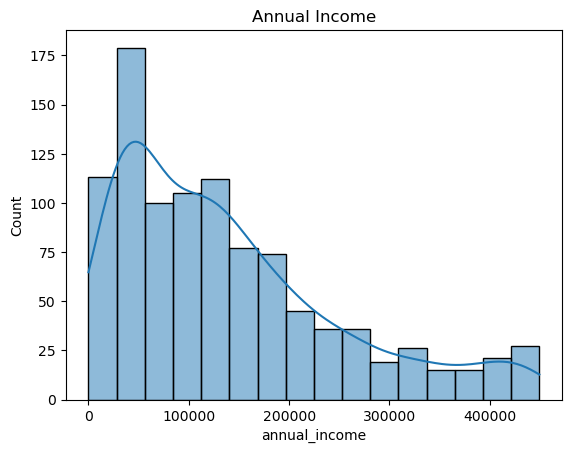

In [14]:
sns.histplot(df_cust.annual_income , kde = True ,label = "Data")
plt.title("Annual Income")


**Dealin with outliers**

In [15]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [16]:
df_cust[df_cust["annual_income"] < 100 ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [17]:
for index , row  in df_cust.iterrows() :
    if row["annual_income"] < 100 :
        df_cust.at[index , "annual_income"] = occupation_wise_median_income[row["occupation"]]



In [18]:
occupation_wise_average_income = df_cust.groupby("occupation").annual_income.mean()
occupation_wise_average_income

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [19]:
df_cust[df_cust["annual_income"] < 100 ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [20]:
occupation_wise_average_income.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [21]:
occupation_wise_average_income.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

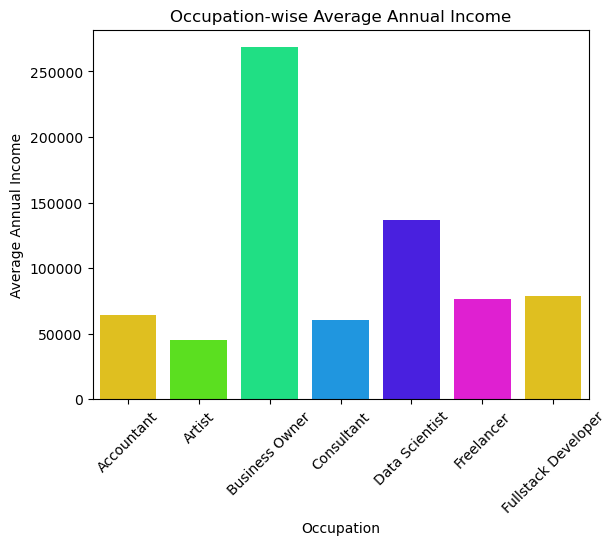

In [22]:
colors = sns.color_palette("hsv")
sns.barplot(x=occupation_wise_average_income.index, y=occupation_wise_average_income.values , palette = colors)

# Adding labels and title to make the plot more informative
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income")
plt.title("Occupation-wise Average Annual Income")
plt.xticks(rotation = 45)

# Displaying the plot
plt.show()


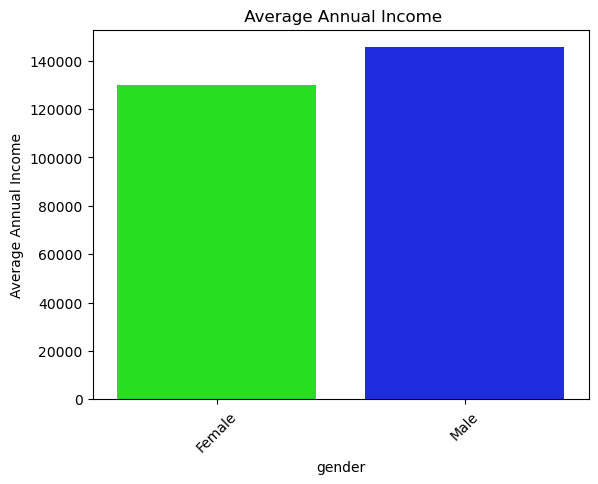

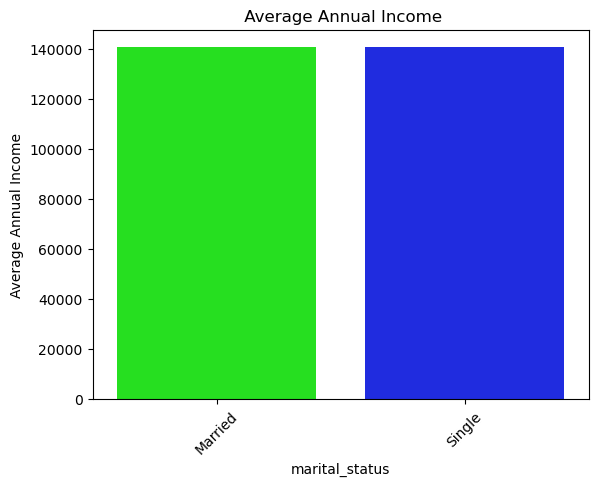

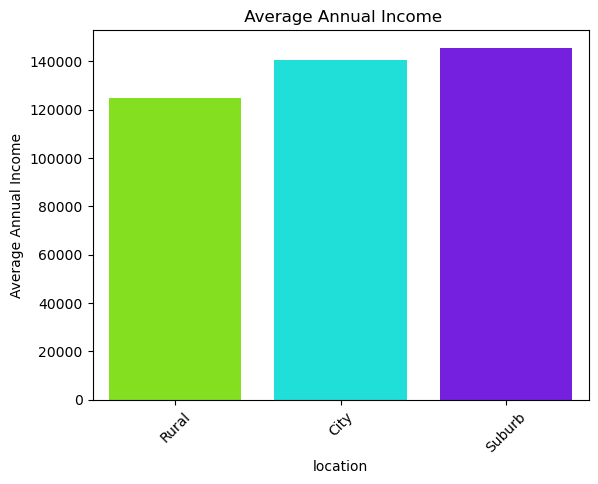

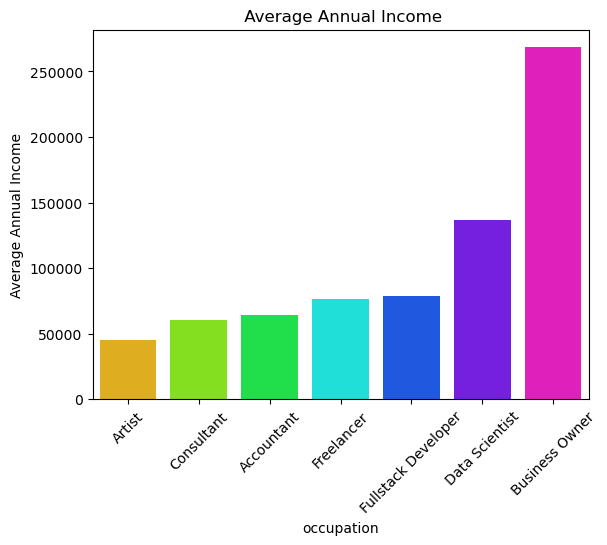

In [23]:
categorical_columns = ["gender","marital_status","location","occupation"]
for col in categorical_columns:
    average_income_per_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
    sns.barplot(x=average_income_per_group.index, y=average_income_per_group.values , palette = "hsv")
    plt.ylabel("Average Annual Income")
    plt.title(" Average Annual Income")
    plt.xticks(rotation = 45)
    plt.show()




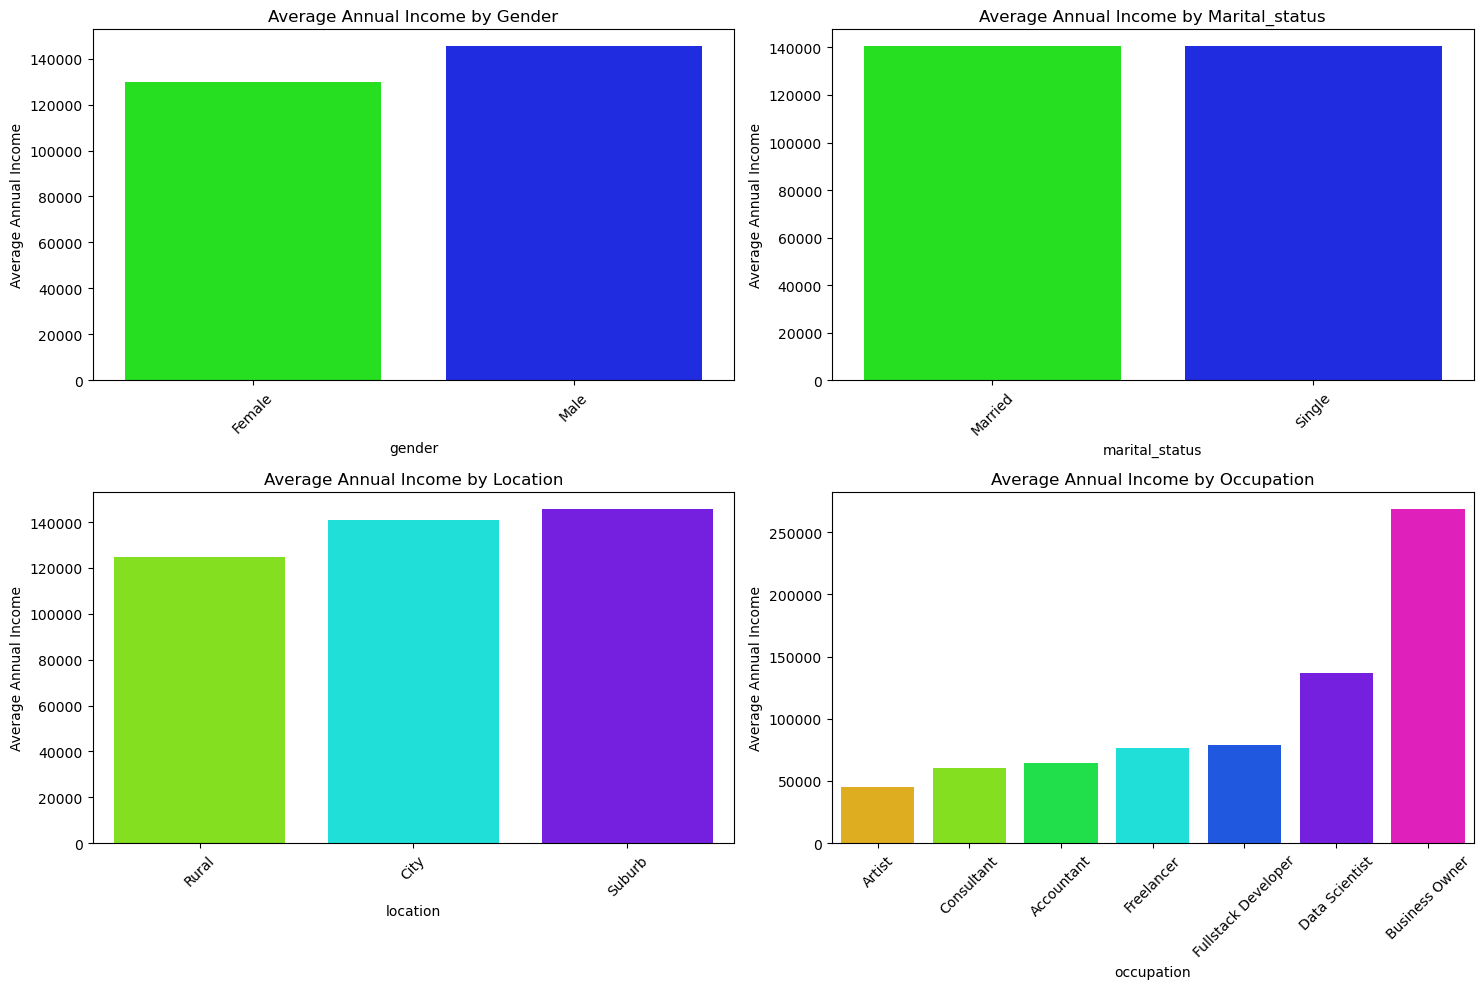

In [24]:

categorical_columns = ["gender", "marital_status", "location", "occupation"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, col in enumerate(categorical_columns):
    average_income_per_group = df_cust.groupby(col)["annual_income"].mean().sort_values()
    sns.barplot(x=average_income_per_group.index, y=average_income_per_group.values, palette="hsv", ax=axes[i])
    axes[i].set_ylabel("Average Annual Income")
    axes[i].set_title(f"Average Annual Income by {col.capitalize()}")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [25]:
df_cust[df_cust["age"].isna()]
#No na values in age column

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [26]:
df_cust["age"].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [27]:
df_cust[(df_cust["age"] > 80) | (df_cust["age"] < 15 ) ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [28]:
occupation_wise_median_age = df_cust.groupby("occupation").age.median()
occupation_wise_median_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [29]:
for index, row in df_cust.iterrows():
    if row["age"] > 80 or row["age"] < 15:
        df_cust.at[index, "age"] = occupation_wise_median_age[row["occupation"]]




In [30]:
df_cust["age"].describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [31]:
df_cust[(df_cust["age"] > 80) | (df_cust["age"] < 15 ) ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


<Axes: xlabel='age', ylabel='Count'>

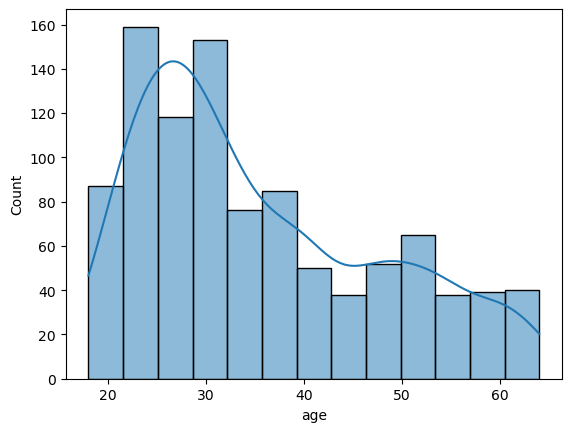

In [32]:
sns.histplot(df_cust.age , kde = True)

**Data visualization age column**

In [33]:
bin = [18,25,48,65]
labels = ["18-25","26-48","49-65"]
df_cust["age_group"] = pd.cut(df_cust["age"],bins = bin , labels = labels)

In [34]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


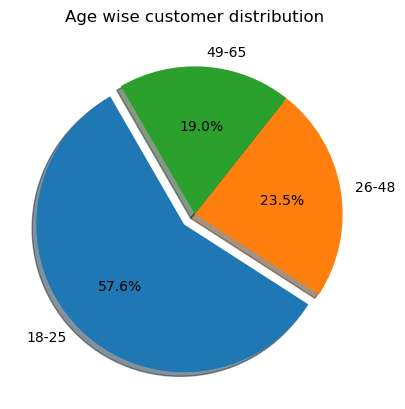

In [35]:
age_distribution = df_cust["age_group"].value_counts()
plt.pie(age_distribution , labels = labels , shadow = True ,
        autopct='%1.1f%%',
        explode = (0.1,0.0,0.0) ,startangle = 120)
plt.title('Age wise customer distribution')
plt.show()

# Gender and age analysis

In [36]:
df_cust['gender'].value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [37]:
df_cust["location"].value_counts()


location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [38]:
customer_location_gender = df_cust.groupby(["location","gender"]).size().unstack(fill_value = 0)
customer_location_gender.head()


gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


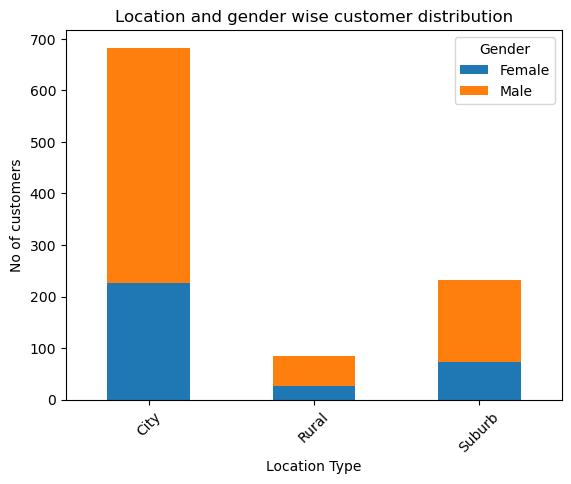

In [39]:
customer_location_gender.plot(kind = 'bar' , stacked = True)
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45)
plt.title('Location and gender wise customer distribution')
plt.xlabel("Location Type")
plt.ylabel('No of customers')
plt.show()

# Exploring credit score table

In [40]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [41]:
df_cs.shape

(1004, 6)

In [42]:
df_cust.shape

(1000, 9)

In [43]:
df_cs["cust_id"].nunique()

1000

In [44]:
df_cs[df_cs["cust_id"].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [45]:
df_cs_clean1 = df_cs.drop_duplicates(subset = 'cust_id',keep = "last")
df_cs_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [46]:
df_cs_clean1.shape

(1000, 6)

In [47]:
df_cs_clean1["cust_id"].nunique()

1000

In [48]:
df_cs_clean1[df_cs_clean1["cust_id"].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [49]:
df_cs_clean1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [50]:
df_cs_clean1[df_cs_clean1['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [51]:
df_cs_clean1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

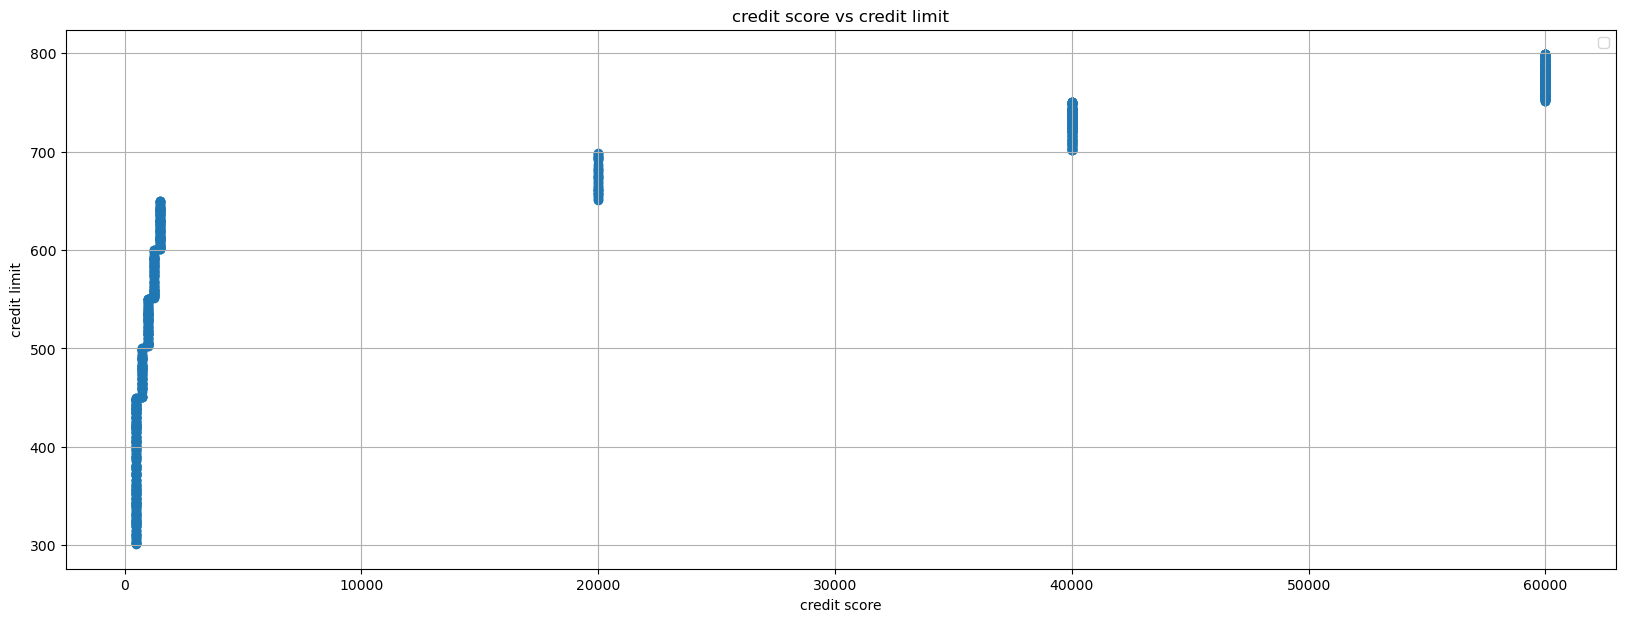

In [52]:
plt.figure(figsize = (20,7))
plt.scatter(df_cs_clean1.credit_limit,df_cs_clean1.credit_score)
plt.grid(True)
plt.title("credit score vs credit limit")
plt.xlabel("credit score")
plt.ylabel("credit limit")
plt.legend()
plt.show()

In [53]:
df_cs_clean1["credit_score"].nunique()

419

In [54]:
bins = [300,350,400,450,500,550,600,650,700,750,800]
label = [f"{start}-{end-1}"for start , end in zip(bins, bins[1:])]
label

['300-349',
 '350-399',
 '400-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [55]:
df_cs_clean1["credit_score_range"] = pd.cut(df_cs_clean1.credit_score ,
                                            bins = bins , 
                                            labels=label , 
                                            include_lowest=True , 
                                            right = True
                                            )
df_cs_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [56]:
df_cs_clean1[df_cs_clean1["credit_score_range"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [57]:
df_cs_clean1[df_cs_clean1["credit_score_range"]== "700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [58]:
df_cs_clean1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19235.561497
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1250.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [59]:
df_cs_clean1[df_cs_clean1["credit_limit"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,NaN,650-699
35,36,790,0.112535,4261.0,1.0,NaN,750-799
37,38,514,0.296971,238.0,2.0,NaN,500-549
45,46,761,0.596041,24234.0,2.0,NaN,750-799
64,65,734,0.473715,13631.0,0.0,NaN,700-749
...,...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN,450-499
931,928,311,0.832244,316.0,2.0,NaN,300-349
948,945,526,0.272734,227.0,1.0,NaN,500-549
954,951,513,0.175914,131.0,3.0,NaN,500-549


In [60]:
df_mode = df_cs_clean1.groupby(df_cs_clean1["credit_score_range"])["credit_limit"].agg( lambda x : x.mode().iloc[0]).reset_index()
df_mode

,credit_score_range,credit_limit
0,300-349,500.0
1,350-399,500.0
2,400-449,500.0
3,450-499,750.0
4,500-549,1000.0
5,550-599,1250.0
6,600-649,1500.0
7,650-699,20000.0
8,700-749,40000.0
9,750-799,60000.0


In [61]:
df_cs_clean2 = pd.merge(df_cs_clean1,df_mode,on = "credit_score_range", suffixes= ("","_mode"))
df_cs_clean2.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [62]:
df_cs_clean2['credit_limit_mode'].isnull().sum()

np.int64(0)

In [63]:
df_cs_clean2["credit_limit"].isnull().sum()

np.int64(65)

In [64]:
df_cs_clean2["credit_limit"].fillna(df_cs_clean2['credit_limit_mode'], inplace = True)

In [65]:
df_cs_clean2[df_cs_clean2["credit_limit"].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [66]:
df_cs_clean2["credit_limit"].isnull().sum()

np.int64(0)

In [67]:
df_cs_clean3 = df_cs_clean2.copy()

In [68]:
df_cs_clean3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


In [69]:
df_cs_clean3[df_cs_clean3['outstanding_debt'] < df_cs_clean3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
5,6,442,0.705409,246.0,4.0,500.0,400-449,500.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [70]:
df_cs_clean3.loc[df_cs_clean3['outstanding_debt'] > df_cs_clean3['credit_limit'], 'outstanding_debt'] = df_cs_clean3['credit_limit']

In [71]:
df_cs_clean3[df_cs_clean3['outstanding_debt'] > df_cs_clean3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [72]:
df_cs_clean3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


**Getting correlation between various columns**

In [73]:
df_cs_clean3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [74]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [75]:
df_merge = pd.merge(df_cust,df_cs_clean3, on = "cust_id")
df_merge.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [76]:
numerical_columns = ["age","annual_income","credit_score","credit_utilisation","outstanding_debt","credit_inquiries_last_6_months","credit_limit"]
correlation_matrix = df_merge[numerical_columns].corr()
correlation_matrix

,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
age,1.000000,0.619037,0.444917,-0.027713,0.444301,-0.025831,0.510980
annual_income,0.619037,1.000000,0.575751,-0.086368,0.555661,0.002747,0.684780
credit_score,0.444917,0.575751,1.000000,-0.070445,0.680654,-0.001226,0.847951
credit_utilisation,-0.027713,-0.086368,-0.070445,1.000000,0.192838,-0.013952,-0.080504
outstanding_debt,0.444301,0.555661,0.680654,0.192838,1.000000,0.019793,0.810581
credit_inquiries_last_6_months,-0.025831,0.002747,-0.001226,-0.013952,0.019793,1.000000,0.014716
credit_limit,0.510980,0.684780,0.847951,-0.080504,0.810581,0.014716,1.000000


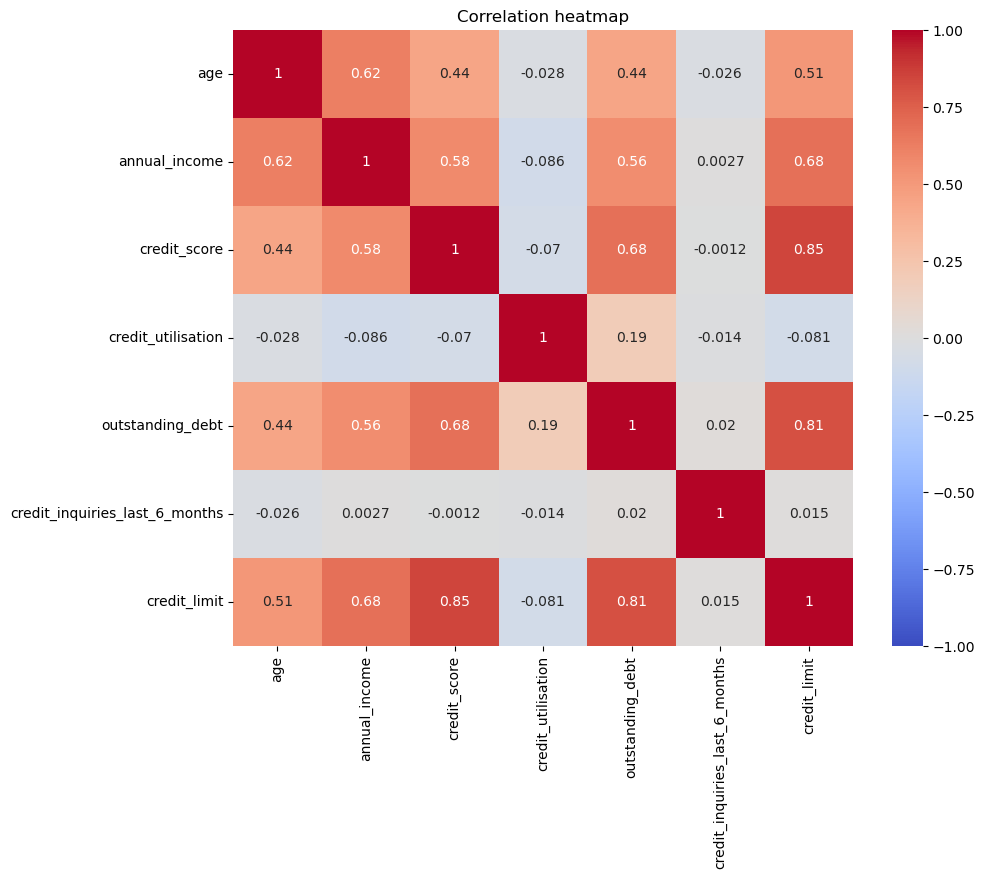

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation heatmap")
plt.show()

# Data cleaning in transection column

In [78]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [79]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [80]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [81]:
df_trans[df_trans["platform"].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [82]:
df_trans["platform"].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [83]:
platform_mode = df_trans["platform"].mode()[0]
platform_mode

'Amazon'

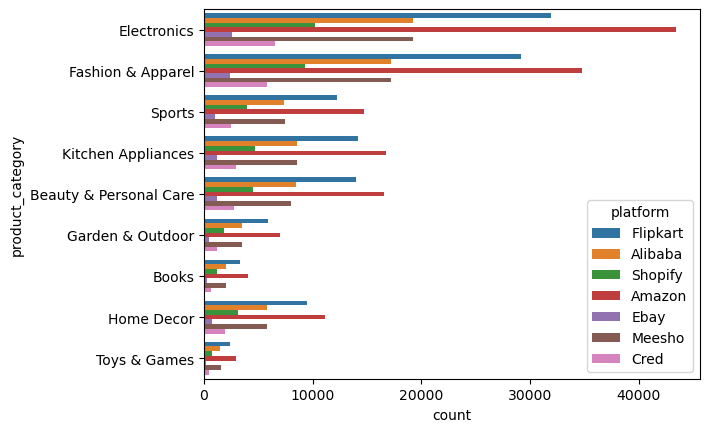

In [84]:
sns.countplot(y="product_category",hue="platform",data = df_trans )
plt.show()

In [85]:
df_trans["platform"].fillna( platform_mode ,inplace = True)

In [86]:
df_trans["platform"].fillna( platform_mode ,inplace = True)

In [87]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [88]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


**Transection amount cannot be zero**

In [89]:
df_trans_zero = df_trans[df_trans["tran_amount"] == 0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [90]:
df_trans_zero[["platform","product_category","payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [91]:
trans_1 = df_trans[(df_trans["platform"] == "Amazon")&(df_trans["product_category"] == "Electronics")&(df_trans["payment_type"] == "Credit Card")]
trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [92]:
df_trans_without_zero = trans_1[trans_1["tran_amount"] > 0]
df_trans_without_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card


In [93]:
trans_amt_median = df_trans_without_zero["tran_amount"].median()
trans_amt_median

554.0

In [94]:
df_trans["tran_amount"].replace(0,trans_amt_median,inplace = True)

In [95]:
df_trans[df_trans["tran_amount"] == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


<Axes: xlabel='tran_amount', ylabel='Count'>

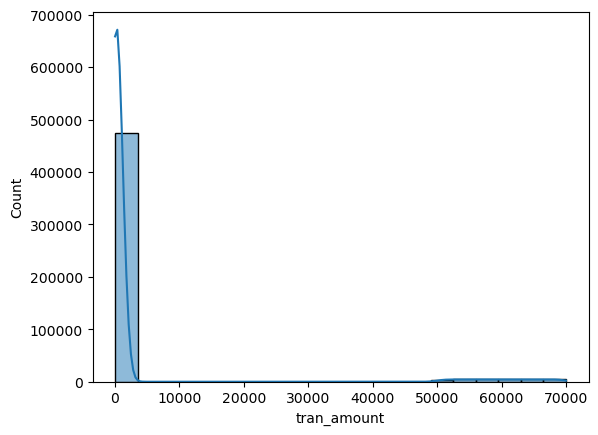

In [96]:
sns.histplot(df_trans["tran_amount"] , bins = 20 ,kde = True)

In [97]:
Q1 , Q3 = df_trans["tran_amount"].quantile([0.25,0.75])
IQR = Q3 - Q1
upper  = Q3 + 2*IQR
lower = Q1 - 2*IQR
upper , lower

(1107.0, -628.0)

In [98]:
df_trans_outliers = df_trans[df_trans["tran_amount"] > upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [99]:
df_trans[df_trans["tran_amount"] < upper].tran_amount.max()

999

In [100]:
df_trans[df_trans["tran_amount"] > upper].tran_amount.min()

50000

In [101]:
df_trans_outliers["tran_amount"].value_counts().sum()

np.int64(25000)

In [102]:
df_trans_normal = df_trans[df_trans["tran_amount"] < upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [103]:
df_product_wise_mean = df_trans_normal.groupby(df_trans_normal.product_category)["tran_amount"].mean()
df_product_wise_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [104]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [105]:
df_trans.loc[df_trans_outliers.index , "tran_amount"] = df_trans_outliers["product_category"].map(df_product_wise_mean)

In [106]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


In [107]:
df_trans["tran_amount"].describe()

count    500000.000000
mean        240.672998
std         241.696597
min           2.000000
25%          64.553463
50%         133.000000
75%         349.000000
max         999.000000
Name: tran_amount, dtype: float64

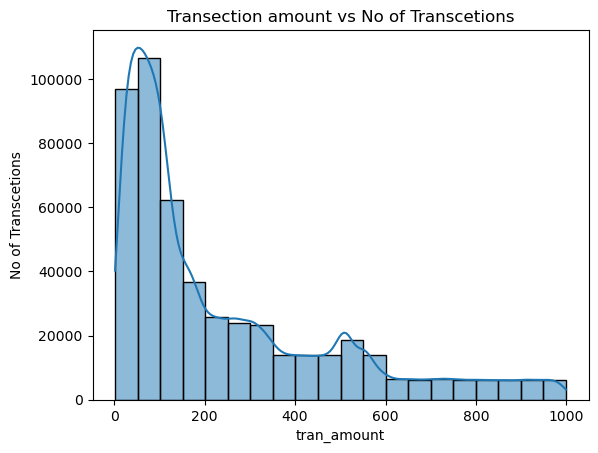

In [108]:
sns.histplot(df_trans ,x = "tran_amount", bins = 20 , kde = True)
plt.title("Transection amount vs No of Transcetions")
plt.ylabel("No of Transcetions")
plt.show()

In [109]:
df_merge.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [110]:
df_merge_2 = pd.merge(df_merge , df_trans , on = "cust_id" , how  = 'inner')
df_merge_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


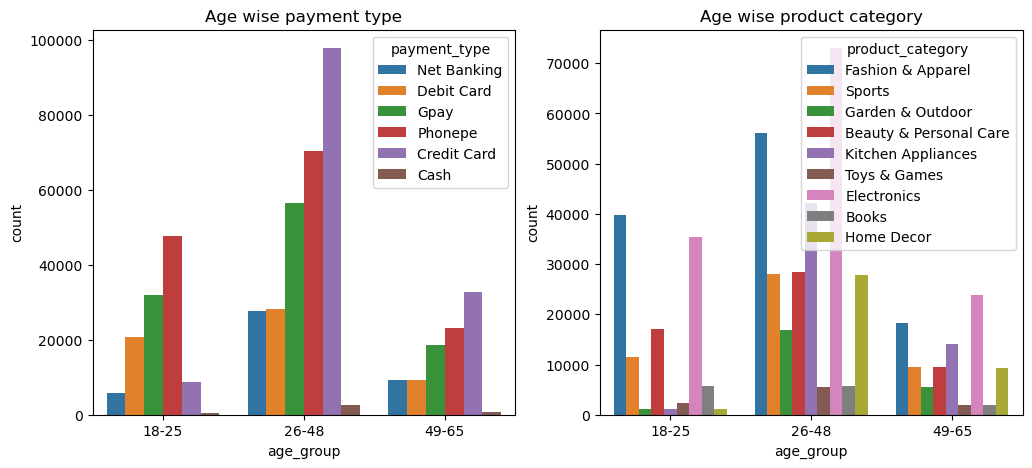

In [111]:
fig , (ax1 , ax2) = plt.subplots( 1,2 ,figsize = (12,5))
sns.countplot(x='age_group',hue = "payment_type" ,data = df_merge_2 , ax = ax1)
ax1.set_title("Age wise payment type")

sns.countplot(x='age_group',hue = "product_category" ,data = df_merge_2 , ax = ax2)
ax2.set_title("Age wise product category")
plt.show()

In [112]:
age_wise_credit_limit_mean =  df_merge_2.groupby('age_group')['credit_limit'].mean()
age_wise_credit_limit_mean

age_group
18-25     1146.855728
26-48    20609.837285
49-65    41781.734465
Name: credit_limit, dtype: float64

In [113]:
transection_amt_mean = df_merge_2.groupby('age_group')['tran_amount'].mean()


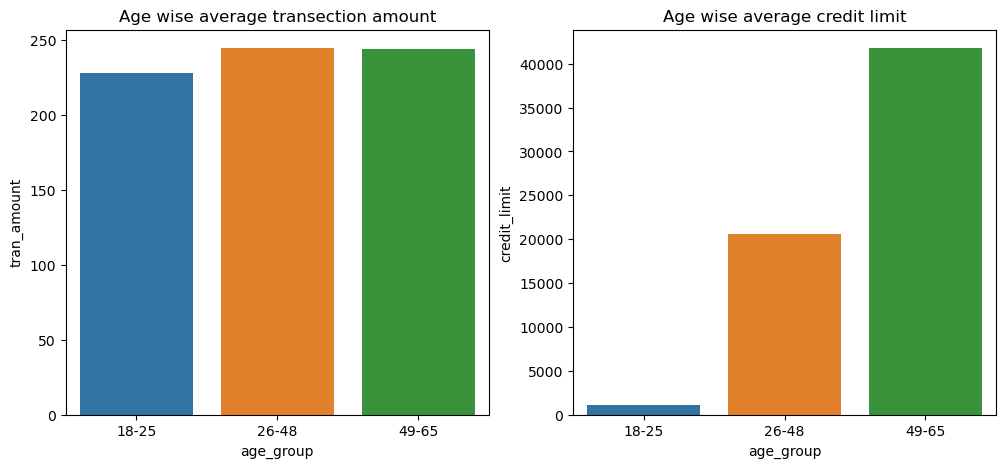

In [114]:
fig , (ax1 , ax2  ) = plt.subplots( 1,2 ,figsize = (12,5))
sns.barplot(transection_amt_mean ,ax = ax1,ci=None, palette='tab10')
ax1.set_title("Age wise average transection amount")
sns.barplot(age_wise_credit_limit_mean ,ax = ax2 , ci=None, palette='tab10')
ax2.set_title("Age wise average credit limit")
plt.show()

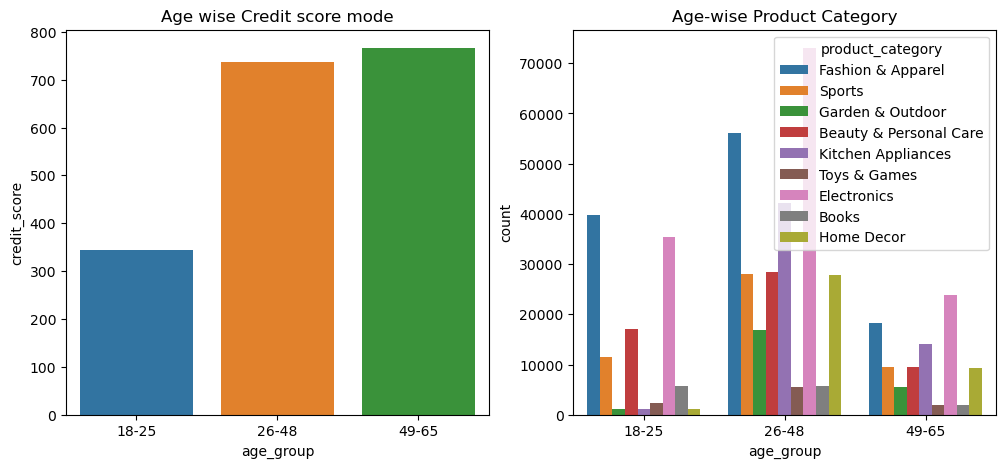

In [115]:
fig , (ax1,ax2) = plt.subplots( 1,2 ,figsize = (12,5))
age_wise_credit_score_mode =  df_merge_2.groupby('age_group')['credit_score'].apply( lambda x : x.mode().iloc[0])
sns.barplot(age_wise_credit_score_mode ,ci=None, palette='tab10',ax = ax1)
ax1.set_title("Age wise Credit score mode")
sns.countplot(x='age_group', hue='product_category', data=df_merge_2, palette='tab10', ax=ax2) 
ax2.set_title("Age-wise Product Category") 
plt.show()

# Insights :

**1)Since , the no creditcard holders in age group 18-25 is less and the have less credit history they can be great potential customers.**

**2)Due to low compition and high potential in this age group it is better to launch a new creditcard for these customers.**